In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.linear_model import LogisticRegression


In [2]:
df = pd.read_csv("../data/Telco-Customer-Churn.csv")
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
print(df.shape)
df.info()
df.isna().sum()


(7043, 21)
<class 'pandas.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   str    
 1   gender            7043 non-null   str    
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   str    
 4   Dependents        7043 non-null   str    
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   str    
 7   MultipleLines     7043 non-null   str    
 8   InternetService   7043 non-null   str    
 9   OnlineSecurity    7043 non-null   str    
 10  OnlineBackup      7043 non-null   str    
 11  DeviceProtection  7043 non-null   str    
 12  TechSupport       7043 non-null   str    
 13  StreamingTV       7043 non-null   str    
 14  StreamingMovies   7043 non-null   str    
 15  Contract          7043 non-null   str    
 16  PaperlessBilling  7043 non-null   str    


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [4]:
df = df.drop("customerID", axis=1)


In [5]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
df["TotalCharges"].isna().sum()

np.int64(11)

In [6]:
df["TotalCharges"] = df["TotalCharges"].fillna(df["TotalCharges"].median())


In [7]:
df["Churn"] = df["Churn"].map({"Yes": 1, "No": 0})
df["Churn"].value_counts()


Churn
0    5174
1    1869
Name: count, dtype: int64

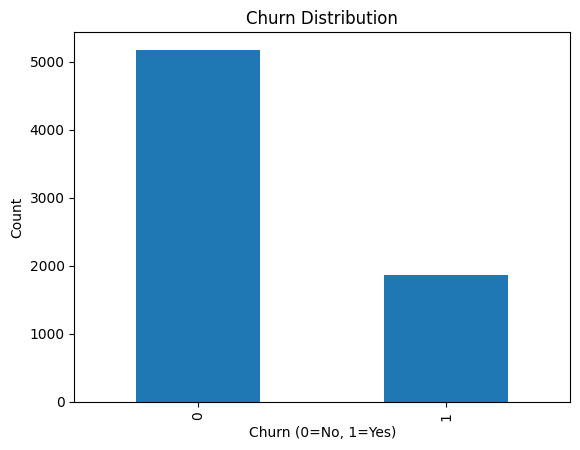

In [8]:
df["Churn"].value_counts().plot(kind="bar")
plt.title("Churn Distribution")
plt.xlabel("Churn (0=No, 1=Yes)")
plt.ylabel("Count")
plt.show()


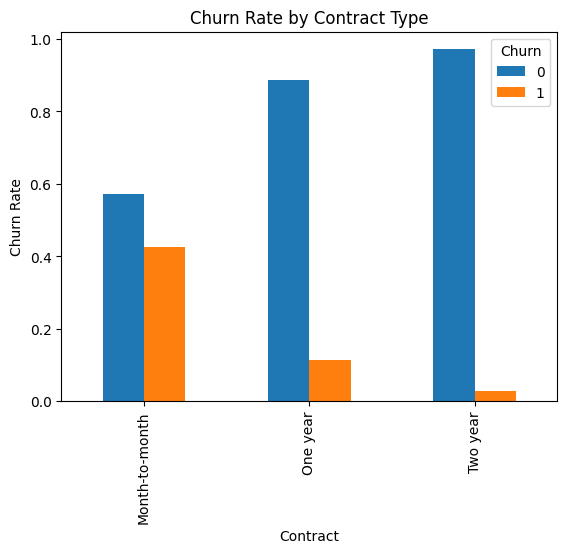

In [9]:
pd.crosstab(df["Contract"], df["Churn"], normalize="index").plot(kind="bar")
plt.title("Churn Rate by Contract Type")
plt.ylabel("Churn Rate")
plt.show()


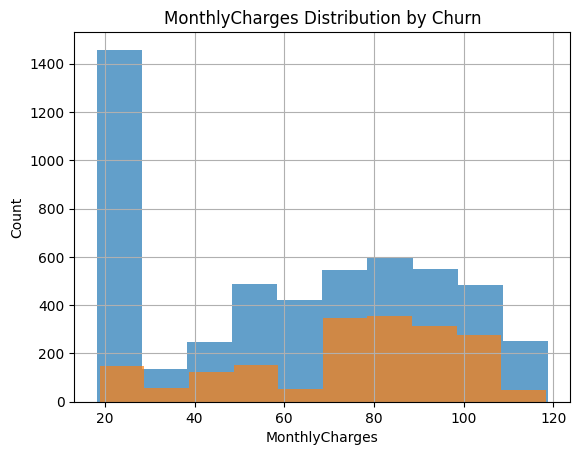

In [10]:
df[df["Churn"]==0]["MonthlyCharges"].hist(alpha=0.7)
df[df["Churn"]==1]["MonthlyCharges"].hist(alpha=0.7)
plt.title("MonthlyCharges Distribution by Churn")
plt.xlabel("MonthlyCharges")
plt.ylabel("Count")
plt.show()


In [11]:
X = df.drop("Churn", axis=1)
y = df["Churn"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


cat_cols = X.select_dtypes(include="object").columns
num_cols = X.select_dtypes(exclude="object").columns

preprocess = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols),
        ("num", "passthrough", num_cols)
    ]
)

model = Pipeline(steps=[
    ("preprocess", preprocess),
    ("classifier", LogisticRegression(max_iter=1000))
])

model.fit(X_train, y_train)


y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


In [12]:
from sklearn.ensemble import RandomForestClassifier

rf_model = Pipeline(steps=[
    ("preprocess", preprocess),
    ("classifier", RandomForestClassifier(
        n_estimators=200,
        random_state=42,
        class_weight="balanced"
    ))
])

rf_model.fit(X_train, y_train)

rf_pred = rf_model.predict(X_test)
rf_prob = rf_model.predict_proba(X_test)[:, 1]

print(classification_report(y_test, rf_pred))
print("ROC-AUC:", roc_auc_score(y_test, rf_prob))
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_pred))


NameError: name 'preprocess' is not defined

Bad pipe message: %s [b'0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.7\r\nHost: localhost:43367\r\nUs', b'-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/144.']
Bad pipe message: %s [b'0.0 Safari/537.36\r\nAccept-Encoding: gzip, defla']
Bad pipe message: %s [b', br, zstd\r\nAccept-Language: en-US,en;q=0.9,kn;q=0.8\r\nCache-Control: max-age=0\r\nReferer: https://miniature-rotary-p', b'ne-pj95pp4jvxrxfxxv.github.dev/\r\nX-Request-ID: a33dd79af934538195e6c2b6c391a399\r\nX-Real-IP: 103.150.153', b'9\r\nX-Forwarded-Port: 443\r\nX-Forwarded-Scheme:', b'ttps\r\nX-Original-URI: /\r\nX-Sche']
Bad pipe message: %s [b': https\r\nsec-fetch-site: same-site\r\nsec-fetch-mode: navigate\r\nsec-fetch-dest: document\r\nsec-ch-ua: "Not(A:Br', b'd";v="8", "Chromium";v="144", "Google Chrome";v="144"\r\nsec-ch-ua-mobile: ?0\r\nsec-ch-ua-platform:']
Bad pipe message: %s [b'Windows"\r\npriority: u=0, i\r\nX-F']
Bad pipe mes

In [ ]:
log_prob = model.predict_proba(X_test)[:, 1]

print("Logistic Regression ROC-AUC:", roc_auc_score(y_test, log_prob))
print("Random Forest ROC-AUC:", roc_auc_score(y_test, rf_prob))


In [ ]:
ohe = rf_model.named_steps["preprocess"].named_transformers_["cat"]
cat_features = ohe.get_feature_names_out(cat_cols)

all_features = np.concatenate([cat_features, num_cols])

importances = rf_model.named_steps["classifier"].feature_importances_
feat_imp = pd.DataFrame({"feature": all_features, "importance": importances})
feat_imp = feat_imp.sort_values("importance", ascending=False)

feat_imp.head(15)


In [ ]:
top15 = feat_imp.head(15)
plt.figure(figsize=(8,5))
plt.barh(top15["feature"][::-1], top15["importance"][::-1])
plt.title("Top 15 Important Features (Random Forest)")
plt.xlabel("Importance")
plt.show()
